## Importacion de librerias

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import adfuller
import pmdarima as pm

## Carga de datasets

In [2]:
df = pd.read_csv('input/viajes_bici.csv')
df = df.set_index('fecha')

In [3]:
df

,destino,viajes
fecha,,
2021-01-01,Fac. Ciencias Económicas,26
2021-01-01,Fac. Medicina,29
2021-01-01,Fac. de Ingeniería,42
2021-01-01,Plaza San Martín,26
2021-01-01,Ciudad Univ. I,0
...,...,...
2024-04-30,Fac. Medicina,66
2024-04-30,Fac. de Ingeniería,59
2024-04-30,Plaza San Martín,58


In [4]:
df_eco = df[df['destino'] == 'Fac. Ciencias Económicas']
df_med = df[df['destino'] == 'Fac. Medicina']
df_ing = df[df['destino'] == 'Fac. de Ingeniería']
df_martin = df[df['destino'] == 'Plaza San Martín']
df_uni_i = df[df['destino'] == 'Ciudad Univ. I']
df_uni_ii = df[df['destino'] == 'Ciudad Univ. II']

## EDA

In [5]:
def Augmented_Dickey_Fuller_Test_func(series , column_name):
  print (f'Resultados de la prueba de Dickey-Fuller para columna: {column_name}')
  dftest = adfuller(series, autolag='AIC')
  dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','No Lags Used','Number of Observations Used'])
  for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
  print (dfoutput)
  if dftest[1] <= 0.05:
    print("Conclusion:====>")
    print("Rechazar la hipótesis nula")
    print("Los datos son estacionarios.")
  else:
    print("Conclusion:====>")
    print("No rechazar la hipótesis nula")
    print("Los datos no son estacionarios.")

### Economicas

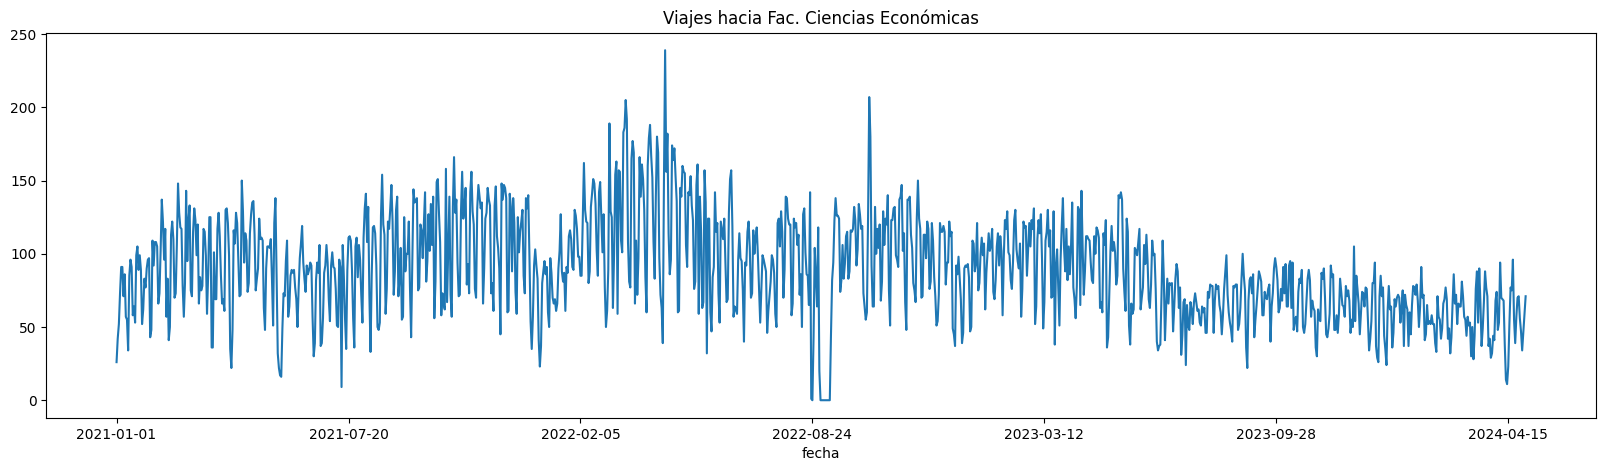

In [6]:
df_eco.viajes.plot(figsize=(20,5), title = "Viajes hacia Fac. Ciencias Económicas")
plt.show()

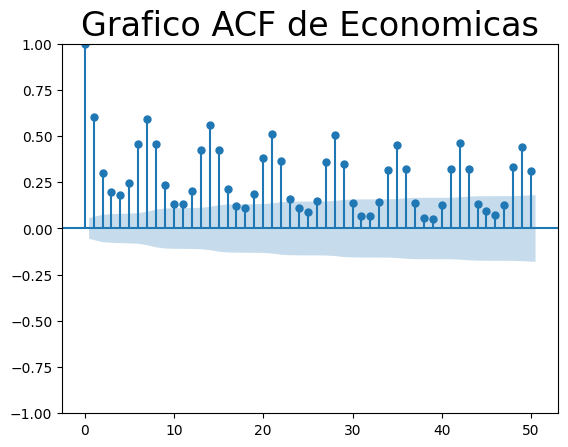

In [ ]:
plot_acf(df_eco.viajes,lags=60)
plt.title("Grafico ACF de Economicas", size= 24)
plt.show()

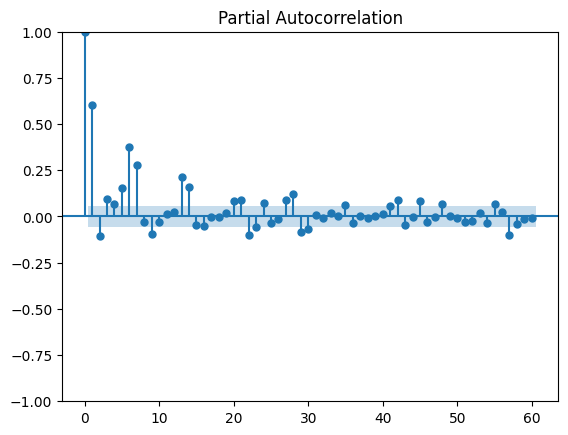

In [31]:
plot_pacf(df_eco.viajes, lags=60);

In [26]:
Augmented_Dickey_Fuller_Test_func(df_eco['viajes'], 'viajes')

Resultados de la prueba de Dickey-Fuller para columna: viajes
Test Statistic                   -2.872259
p-value                           0.048670
No Lags Used                     23.000000
Number of Observations Used    1192.000000
Critical Value (1%)              -3.435848
Critical Value (5%)              -2.863968
Critical Value (10%)             -2.568063
dtype: float64
Conclusion:====>
Rechazar la hipótesis nula
Los datos son estacionarios.


### Medicina

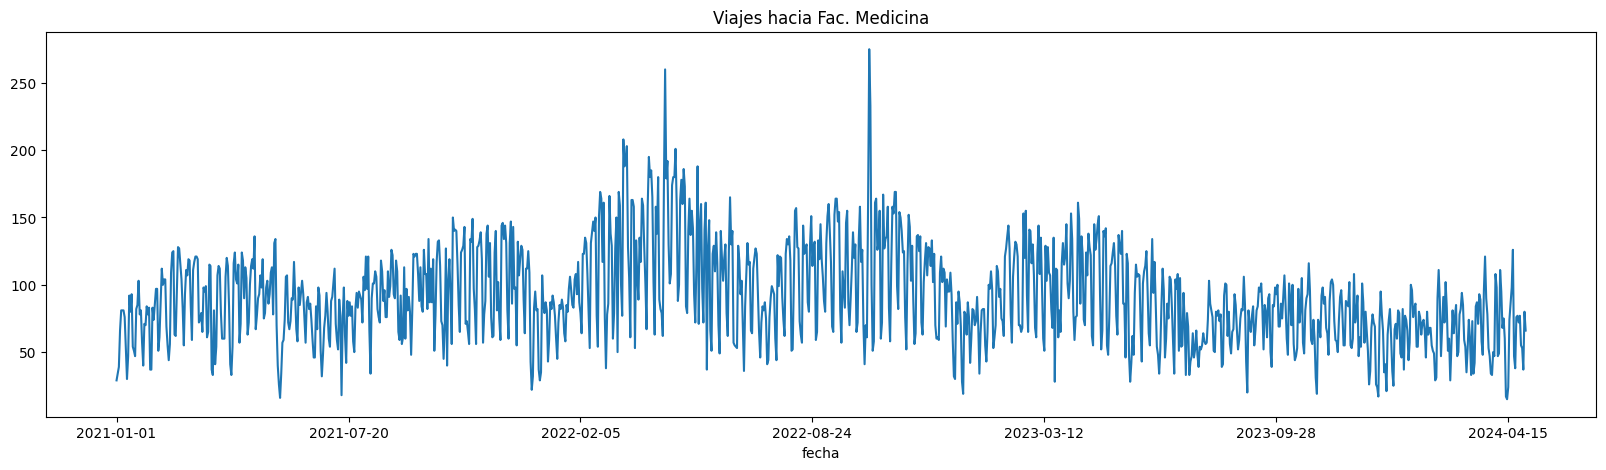

In [9]:
df_med.viajes.plot(figsize=(20,5), title = "Viajes hacia Fac. Medicina")
plt.show()

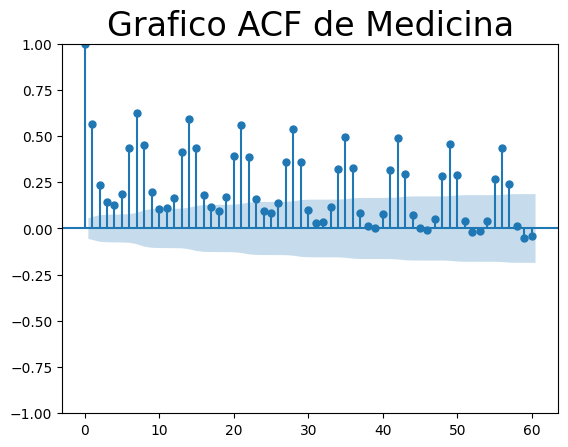

In [10]:
plot_acf(df_med.viajes,lags=60)
plt.title("Grafico ACF de Medicina", size= 24)
plt.show()

In [11]:
Augmented_Dickey_Fuller_Test_func(df_med['viajes'], 'viajes')

Resultados de la prueba de Dickey-Fuller para columna: viajes
Test Statistic                   -2.602867
p-value                           0.092406
No Lags Used                     21.000000
Number of Observations Used    1194.000000
Critical Value (1%)              -3.435839
Critical Value (5%)              -2.863964
Critical Value (10%)             -2.568060
dtype: float64
Conclusion:====>
No rechazar la hipótesis nula
Los datos no son estacionarios.


### Ingenieria

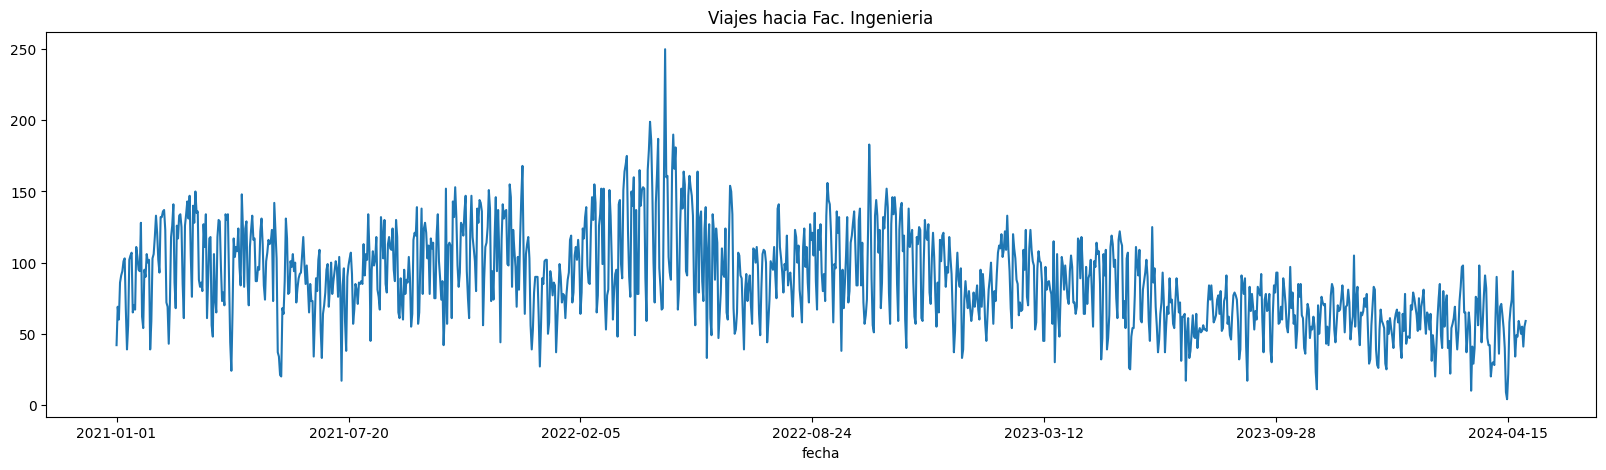

In [12]:
df_ing.viajes.plot(figsize=(20,5), title = "Viajes hacia Fac. Ingenieria")
plt.show()

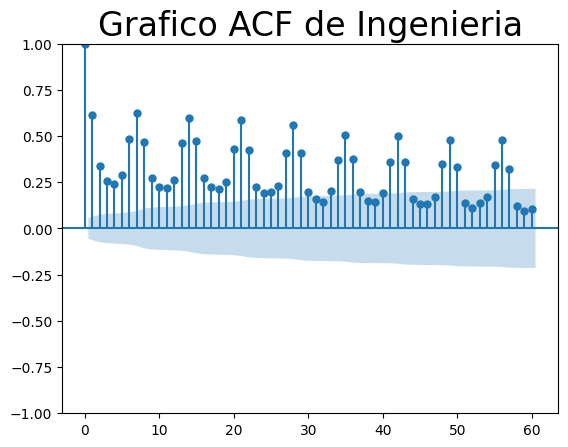

In [13]:
plot_acf(df_ing.viajes,lags=60)
plt.title("Grafico ACF de Ingenieria", size= 24)
plt.show()

In [14]:
Augmented_Dickey_Fuller_Test_func(df_ing['viajes'], 'viajes')

Resultados de la prueba de Dickey-Fuller para columna: viajes
Test Statistic                   -2.276255
p-value                           0.179741
No Lags Used                     22.000000
Number of Observations Used    1193.000000
Critical Value (1%)              -3.435843
Critical Value (5%)              -2.863966
Critical Value (10%)             -2.568061
dtype: float64
Conclusion:====>
No rechazar la hipótesis nula
Los datos no son estacionarios.


### Plaza San Martin

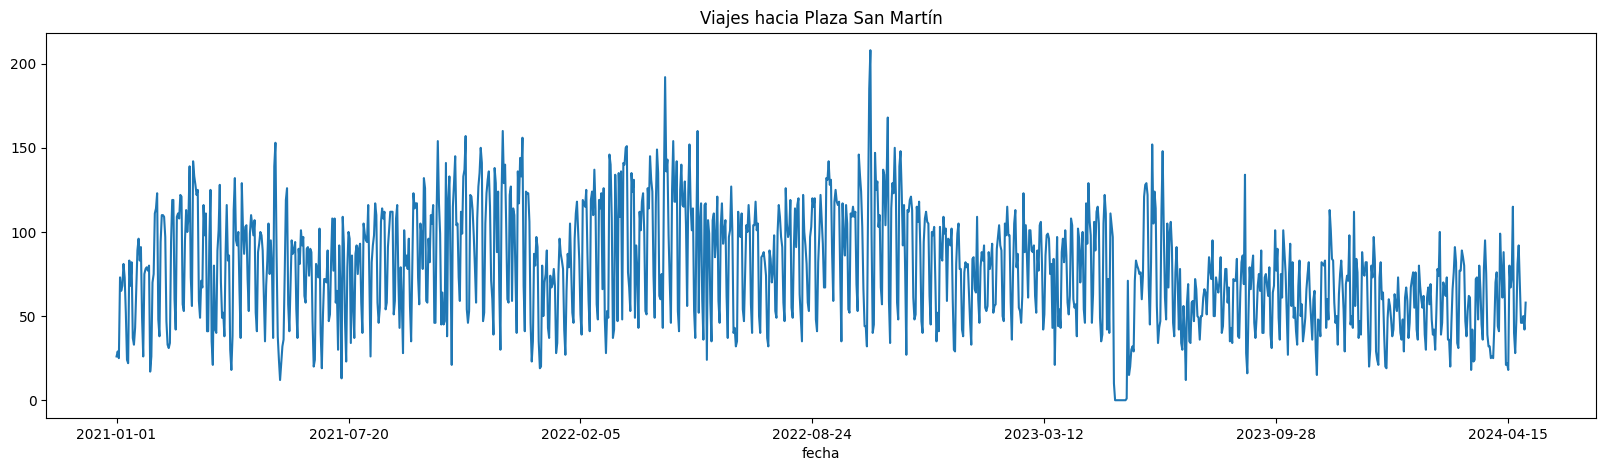

In [15]:
df_martin.viajes.plot(figsize=(20,5), title = "Viajes hacia Plaza San Martín")
plt.show()

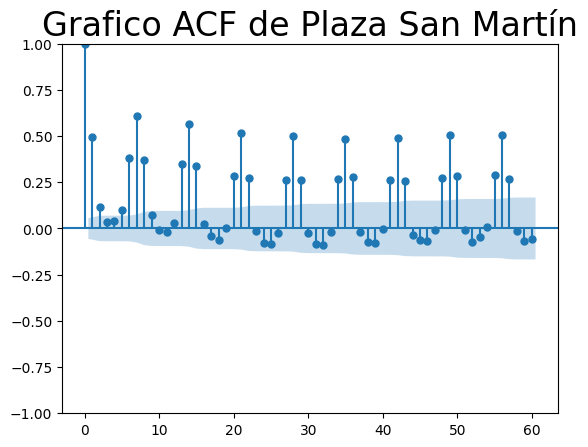

In [16]:
plot_acf(df_martin.viajes,lags=60)
plt.title("Grafico ACF de Plaza San Martín", size= 24)
plt.show()

In [17]:
Augmented_Dickey_Fuller_Test_func(df_martin['viajes'], 'viajes')

Resultados de la prueba de Dickey-Fuller para columna: viajes
Test Statistic                   -3.974560
p-value                           0.001550
No Lags Used                     21.000000
Number of Observations Used    1194.000000
Critical Value (1%)              -3.435839
Critical Value (5%)              -2.863964
Critical Value (10%)             -2.568060
dtype: float64
Conclusion:====>
Rechazar la hipótesis nula
Los datos son estacionarios.


### Ciudad Universitaria I

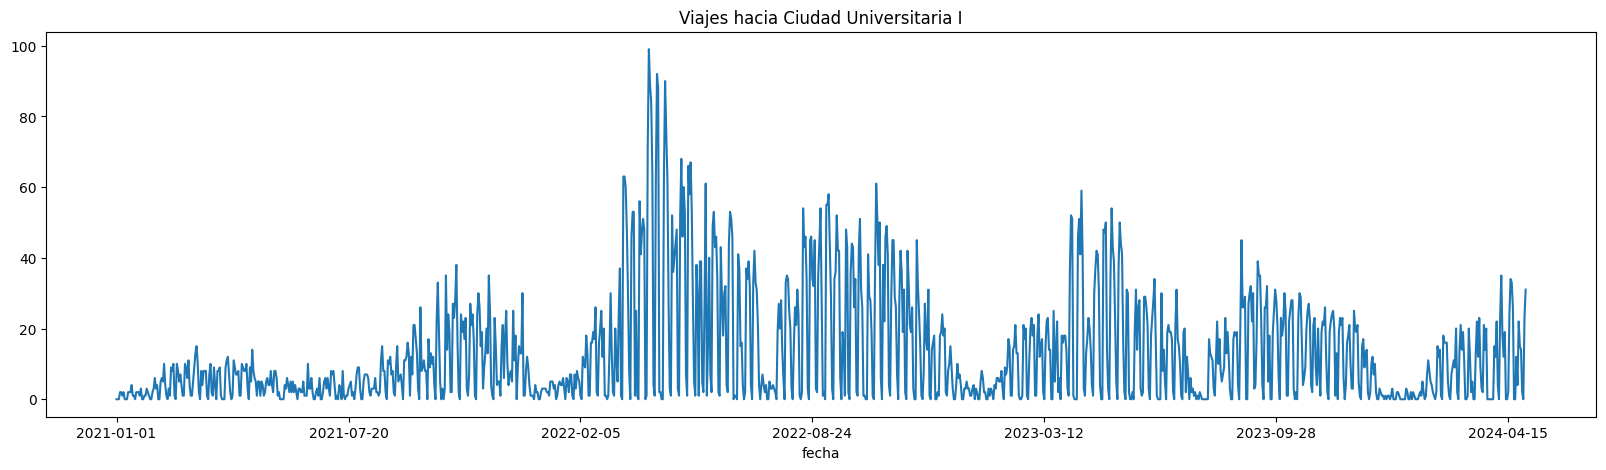

In [18]:
df_uni_i.viajes.plot(figsize=(20,5), title = "Viajes hacia Ciudad Universitaria I")
plt.show()

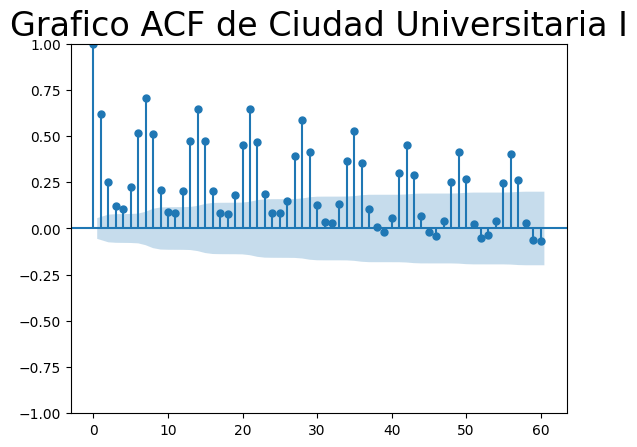

In [19]:
plot_acf(df_uni_i.viajes,lags=60)
plt.title("Grafico ACF de Ciudad Universitaria I", size= 24)
plt.show()

In [20]:
Augmented_Dickey_Fuller_Test_func(df_uni_i['viajes'], 'viajes')

Resultados de la prueba de Dickey-Fuller para columna: viajes
Test Statistic                   -2.542222
p-value                           0.105536
No Lags Used                     23.000000
Number of Observations Used    1192.000000
Critical Value (1%)              -3.435848
Critical Value (5%)              -2.863968
Critical Value (10%)             -2.568063
dtype: float64
Conclusion:====>
No rechazar la hipótesis nula
Los datos no son estacionarios.


### Ciudad Universitaria II

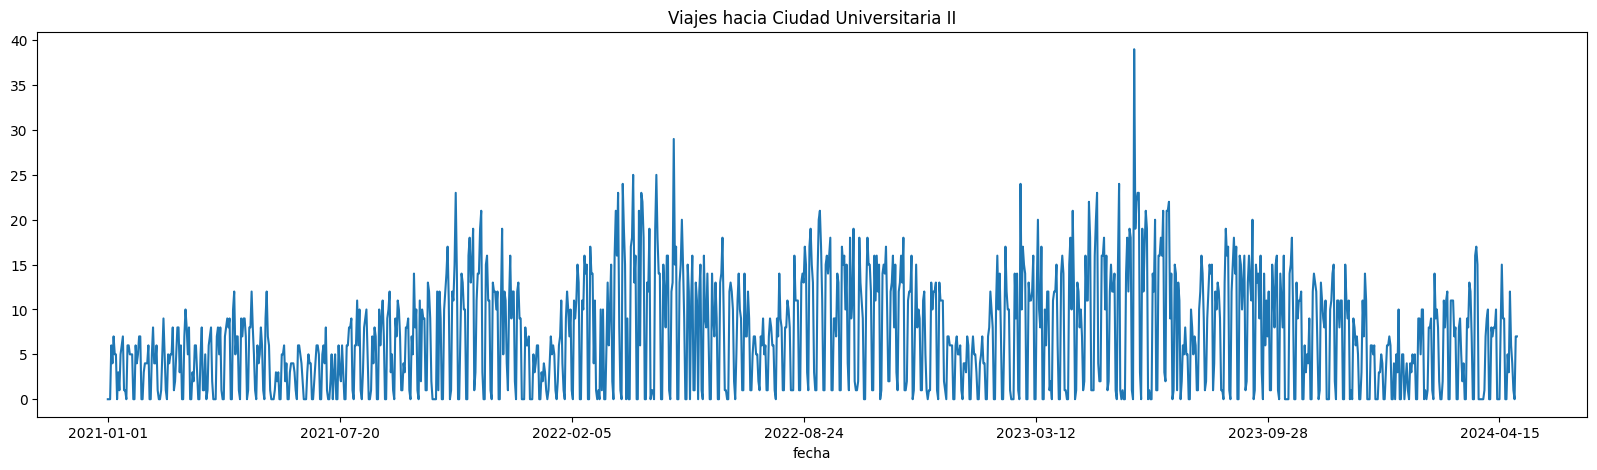

In [21]:
df_uni_ii.viajes.plot(figsize=(20,5), title = "Viajes hacia Ciudad Universitaria II")
plt.show()

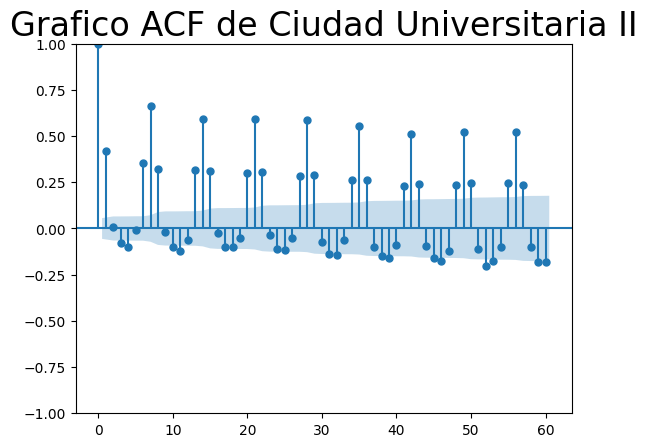

In [22]:
plot_acf(df_uni_ii.viajes,lags=60)
plt.title("Grafico ACF de Ciudad Universitaria II", size= 24)
plt.show()

In [23]:
Augmented_Dickey_Fuller_Test_func(df_uni_ii['viajes'], 'viajes')

Resultados de la prueba de Dickey-Fuller para columna: viajes
Test Statistic                   -3.402303
p-value                           0.010881
No Lags Used                     22.000000
Number of Observations Used    1193.000000
Critical Value (1%)              -3.435843
Critical Value (5%)              -2.863966
Critical Value (10%)             -2.568061
dtype: float64
Conclusion:====>
Rechazar la hipótesis nula
Los datos son estacionarios.
